In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,6) # Adjust the configuration of the plots we will create

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science project/python Co-relation/movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#let's see the missing value in the dataset
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df['budget'].fillna(int(df['budget'].mean()),inplace=True)

In [ ]:
df['budget']= df['budget'].astype('int64')

In [ ]:
df.budget

0       19000000
1        4500000
2       18000000
3        3500000
4        6000000
          ...   
7663        7000
7664    35589876
7665       58750
7666       15000
7667    35589876
Name: budget, Length: 7668, dtype: int64

In [ ]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [ ]:
df['rating'].fillna('R',inplace=True)


In [ ]:
df['company'].value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
Tim Burton Productions        1
PK 65 Films                   1
Name: company, Length: 2385, dtype: int64

In [ ]:
df.loc[df['name'] == 'Saw: The Final Chapter','released']='October 29, 2010'

In [ ]:
df.loc[df['name'] == 'The Wolfman','released']='February 12, 2010 (USA)'

In [ ]:
df.loc[df['runtime'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,"October 29, 2010",5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,USA,35589876,78500541,Lionsgate Home Entertainment,NaN
5730,The Wolfman,R,Drama,2010,"February 12, 2010 (USA)",5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,USA,35589876,78500541,Universal Pictures Relativity Media Stuber Pic...,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000,38084162,Lakeshore Entertainment,NaN
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN


In [ ]:
df.loc[df['name']=='A Night in Heaven','company'] = 'Not Mention'
df.loc[df['name']=='White Star','company']='Roland Klick Production,Maran Film'
df.loc[df['name']=='Last Plane Out','company'] = 'Not Mention'
df.loc[df['name']=='The Bear','company'] = 'Austin'
df.loc[df['name']=='Modern Girls','company'] = 'Not Mention'
df.loc[df['name']=='P.O.W. the Escape','company'] = 'Not Mention'
df.loc[df['name']=='Heart of Dixie','company'] = 'Not Mention'
df.loc[df['name']=='Lost Angels','company'] = 'Not Mention'
df.loc[df['name']=='Staying Together','company'] = 'Hemdale Film Corporation'
df.loc[df['name']=='Streets','company'] = 'dj2 Entertainment and Escape Artists'
df.loc[df['name']=='Saw: The Final Chapter','company'] = 'Lionsgate Home Entertainment'
df.loc[df['name']=='The Wolfman','company'] = 'Universal Pictures Relativity Media Stuber Pictures'
df.loc[df['name']=='End of the Century','company'] = 'Alsina 427 JWProductions'
df.loc[df['name']=='Leap','company'] = 'The Weinstein Company (TWC)'
df.loc[df['name']=='The Robinsons','company'] = 'Walt Disney Animation Studios'
df.loc[df['name']=='More to Life','company'] = 'Not Mention'
df.loc[df['name']=='It\'s Just Us','company'] = 'Pink Hoodie Productions'

In [ ]:
df.loc[df['name']=='Love by Drowning','score'] = 8.0
df.loc[df['name']=='The Robinsons','score'] = 8.0
df.loc[df['name']=='It\'s Just Us','score'] = 4.1

In [ ]:
df.loc[df['name']=='Love by Drowning','votes'] = 13
df.loc[df['name']=='The Robinsons','votes'] = 142
df.loc[df['name']=='It\'s Just Us','votes'] = 9

In [ ]:
df.loc[df['name']=='The Garden','writer'] = 'Derek Jarman'
df.loc[df['name']=='The Trip','writer'] = 'Nick Ball,John Niven,Tommy Wirkola,Nick Ball,John Niven,Tommy Wirkola'
df.loc[df['name']=='Legend of Deification','writer'] = 'Shawn Conners,Sun Tzu,Wu Qi,Sima Rangju'

In [ ]:
df.loc[df['name']=='The Business of Show Business','star'] = 'Marilyn Monroe'

In [ ]:
df.loc[df['name']=='Saw: The Final Chapter','country']='USA'
df.loc[df['name']=='Clinton Road','country']='USA'
df.loc[df['name']=='The Wolfman','country']='USA'

In [ ]:
df['gross'].fillna(int(df['gross'].mean()),inplace=True)
df['gross']= df['gross'].astype('int64')

In [ ]:
df.loc[df['name']=='Saw: The Final Chapter','runtime'] = 90.0
df.loc[df['name']=='The Wolfman','runtime'] = 119
df.loc[df['name']=='One for the Money','runtime'] = 91
df.loc[df['name']=='Saving Mbango','runtime'] = 110

In [36]:
df_cleaned_data=pd.read_csv('/content/drive/MyDrive/Data Science project/python Co-relation/Cleaned Movie Data')

In [37]:
df_cleaned_data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


In [5]:
pd.set_option('display.max_rows',None)

In [ ]:
df_cleaned_data['company'].sort_values(ascending=False)

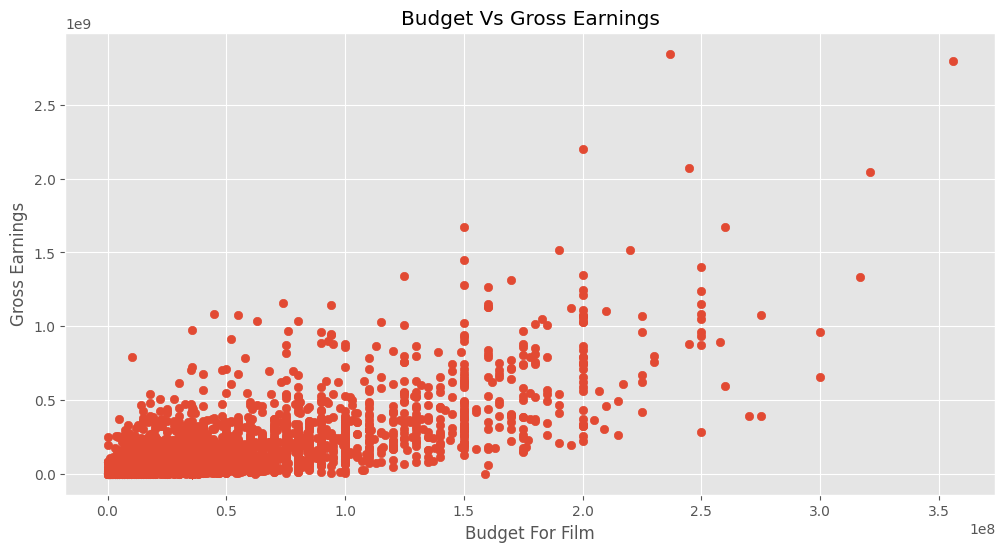

In [14]:
plt.scatter(x=df_cleaned_data['budget'],y=df_cleaned_data['gross'])
plt.title('Budget Vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget For Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

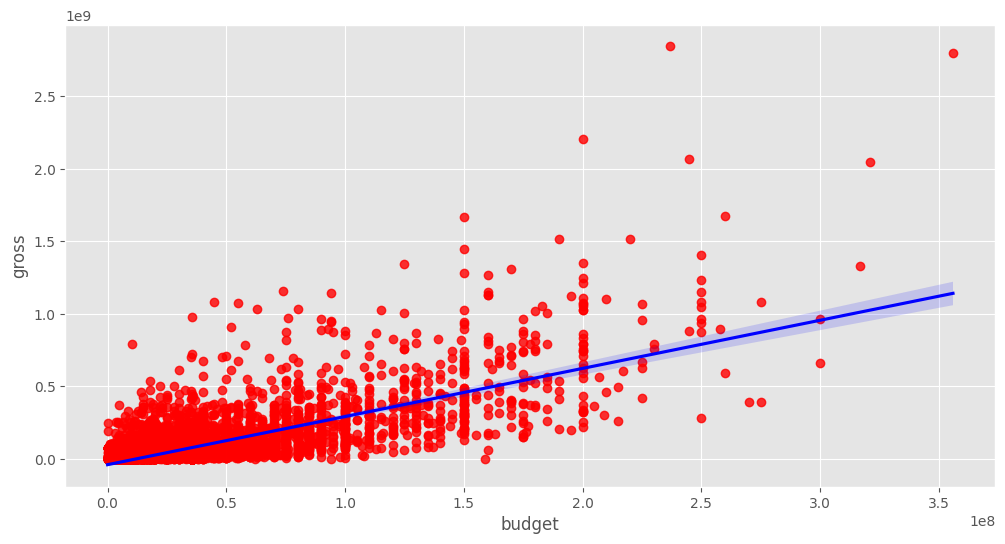

In [16]:
sns.regplot(x='budget',y='gross',data=df_cleaned_data,scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: >

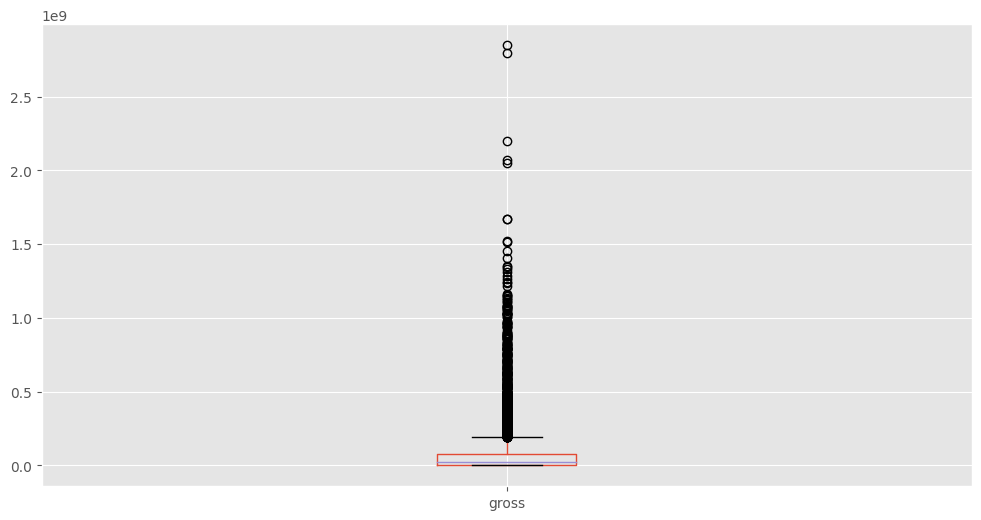

In [9]:
#Is there any outliers exists or not
df_cleaned_data.boxplot(column=['gross'])

In [24]:
corr_matrix = df_cleaned_data.corr(method='pearson') #pearson, kendall, spearman
corr_matrix

<ipython-input-24-5d9431097314>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned_data.corr(method='pearson') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.098084,0.222427,0.265578,0.252042,0.120632
score,0.098084,1.000000,0.408795,0.064374,0.182736,0.398897
votes,0.222427,0.408795,1.000000,0.421194,0.628677,0.309099
budget,0.265578,0.064374,0.421194,1.000000,0.711270,0.265218
gross,0.252042,0.182736,0.628677,0.711270,1.000000,0.241331
runtime,0.120632,0.398897,0.309099,0.265218,0.241331,1.000000


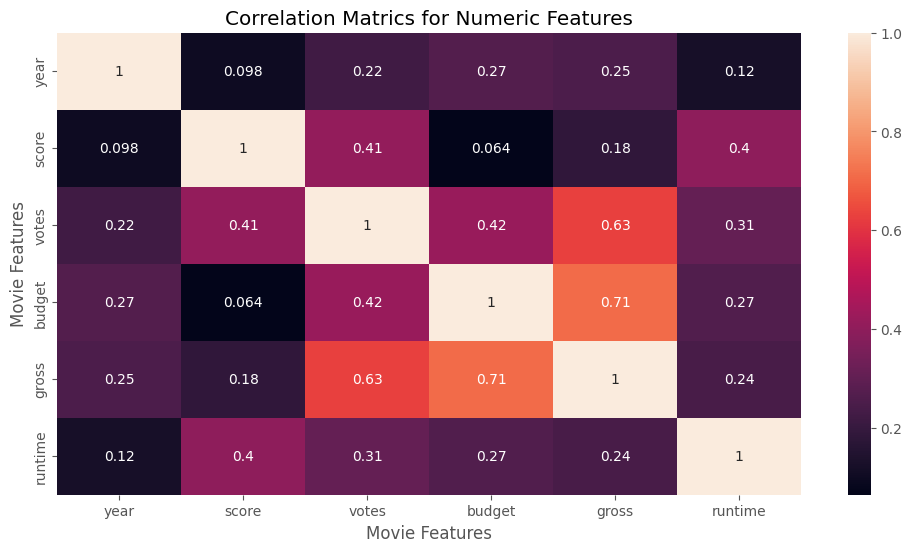

In [29]:
sns.heatmap(corr_matrix,annot= True)
plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
df_numerized=df_cleaned_data

In [39]:
#Looks at Company
for col in df_numerized.columns:
  if(df_numerized[col].dtype =='object'):
    df_numerized[col] = df_numerized[col].astype('category')
    df_numerized[col] = df_numerized[col].cat.codes


In [41]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1706,8.4,927000.0,2589,4016,1047,55,19000000,46998772,2327,146.0
1,5573,6,1,1980,1493,5.8,65000.0,2269,1632,327,56,4500000,58853106,733,104.0
2,5142,4,0,1980,1772,8.7,1200000.0,1111,2567,1746,56,18000000,538375067,1544,124.0
3,286,4,4,1980,1493,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1817,88.0
4,1027,6,4,1980,1544,7.3,108000.0,1054,521,410,56,6000000,39846344,1782,98.0


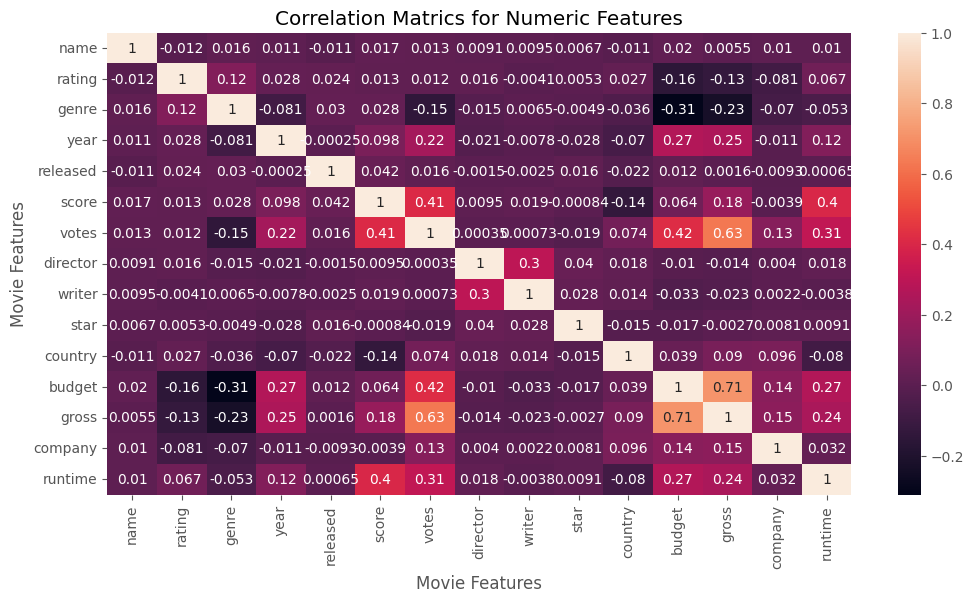

In [43]:
corr_matrix2 = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix2,annot=True)
plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [47]:
corr_mat = df_numerized.corr()
corr_unstackmat=corr_mat.unstack()
corr_unstackmat_sorted = corr_unstackmat.sort_values()
high_corr=corr_unstackmat_sorted[(corr_unstackmat_sorted)>0.5]
high_corr # votes and budgets have the highest co-rrelation in the gross earnings

gross     votes       0.628677
votes     gross       0.628677
gross     budget      0.711270
budget    gross       0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64